# Q1: Slice and Dice

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit = pd.read_csv("C:/Users/Wyn/Documents/data/default_of_credit_card_clients.csv", header=1)

In [3]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
credit.set_index('ID', inplace=True)

In [5]:
credit.rename(columns={'default payment next month': 'default-payment'}, inplace=True)

In [6]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default-payment
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   LIMIT_BAL        30000 non-null  int64
 1   SEX              30000 non-null  int64
 2   EDUCATION        30000 non-null  int64
 3   MARRIAGE         30000 non-null  int64
 4   AGE              30000 non-null  int64
 5   PAY_0            30000 non-null  int64
 6   PAY_2            30000 non-null  int64
 7   PAY_3            30000 non-null  int64
 8   PAY_4            30000 non-null  int64
 9   PAY_5            30000 non-null  int64
 10  PAY_6            30000 non-null  int64
 11  BILL_AMT1        30000 non-null  int64
 12  BILL_AMT2        30000 non-null  int64
 13  BILL_AMT3        30000 non-null  int64
 14  BILL_AMT4        30000 non-null  int64
 15  BILL_AMT5        30000 non-null  int64
 16  BILL_AMT6        30000 non-null  int64
 17  PAY_AMT1         30000 non-null  int64
 18  PAY_AM

In [8]:
credit.isnull().sum()

LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default-payment    0
dtype: int64

# Q1.1 How many customers are in the sample? 

In [9]:
#We see that there is 30,000 records/customers in this sample
credit.shape[0]

30000

# Q1.2 What is the most common sex in the sample?

In [10]:
credit.SEX.mode()

0    2
dtype: int64

In [11]:
credit.SEX.value_counts()
#We see that 2 is the most common sex in the sample, indicating that they are females

2    18112
1    11888
Name: SEX, dtype: int64

<AxesSubplot:xlabel='SEX', ylabel='count'>

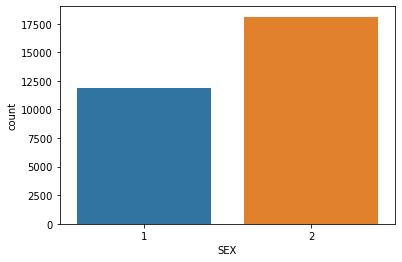

In [12]:
# show the counts by SEX with countplot
sns.countplot(x="SEX", data=credit)

# Q1.3 Which sex has the most defaults?



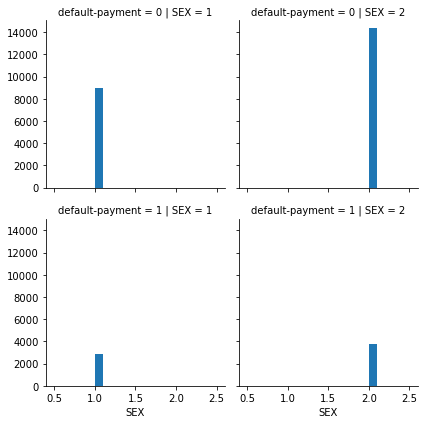

In [13]:
g = sns.FacetGrid(credit, row='default-payment', col='SEX')
g = g.map(plt.hist, 'SEX')
plt.show()

In [14]:
#We see women to have more defaulters, but it should also be noted there are more women in the sample

<AxesSubplot:xlabel='SEX'>

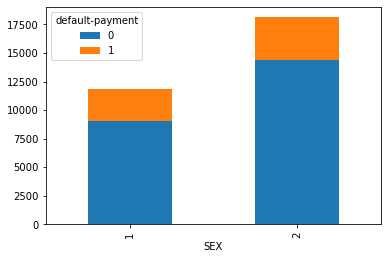

In [15]:
pd.crosstab(credit['SEX'], credit['default-payment']).plot(kind='bar', stacked=True)

# Q1.4 How many distinct values does marriage take on?

In [16]:
credit['MARRIAGE'].value_counts()
#All four different maritial status'
#1 = married; 2 = single; 3 = others
#0 = null values?

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [17]:
credit['MARRIAGE'].nunique()

4

<AxesSubplot:xlabel='MARRIAGE'>

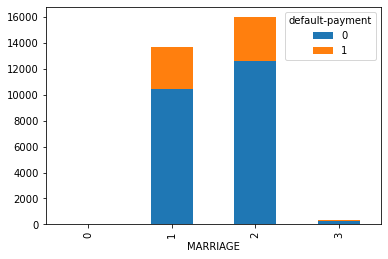

In [18]:
# visualize Marriage status and default-payment
pd.crosstab(credit['MARRIAGE'], credit['default-payment']).plot(kind='bar', stacked=True)
#1 = married; 2 = single; 3 = others

## EDA for Education and default-payment

<AxesSubplot:xlabel='EDUCATION'>

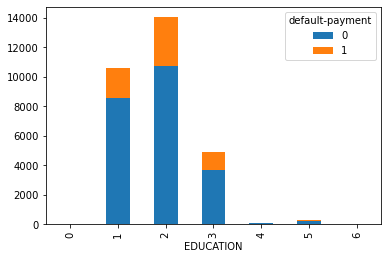

In [19]:
# visualize Education and default-payment
pd.crosstab(credit['EDUCATION'], credit['default-payment']).plot(kind='bar', stacked=True)
# 1 = graduate school; 2 = university; 3 = high school; 4 = others

# Q2: Histograms and Boxplots

# Q2.1 How is BILL_AMT1 distributed by sex?

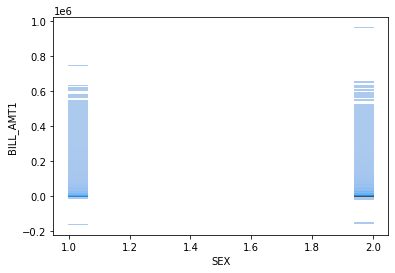

In [20]:
sns.histplot(data=credit, x = 'SEX', y = 'BILL_AMT1')
plt.show()
#SEX: (1 = male; 2 = female)

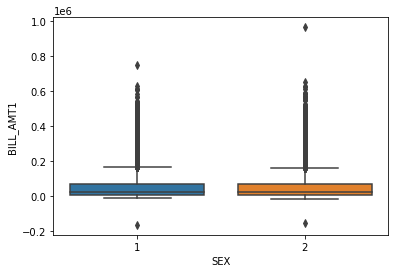

In [21]:
sns.boxplot(data=credit, x = 'SEX', y ='BILL_AMT1')
plt.show()

# Q2.2 Does there appear to be any relationship between default and AGE?

<AxesSubplot:xlabel='AGE', ylabel='default-payment'>

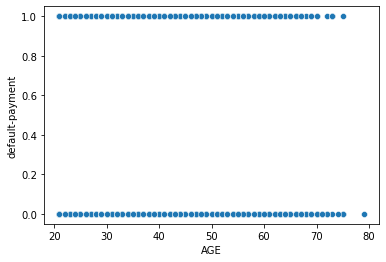

In [22]:
sns.scatterplot(data=credit, x = 'AGE', y ='default-payment')

<AxesSubplot:xlabel='default-payment', ylabel='AGE'>

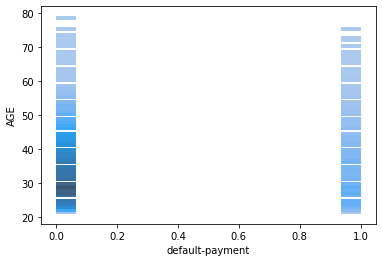

In [23]:
sns.histplot(data=credit, x = 'default-payment', y = 'AGE', legend='full')

<AxesSubplot:xlabel='AGE', ylabel='Count'>

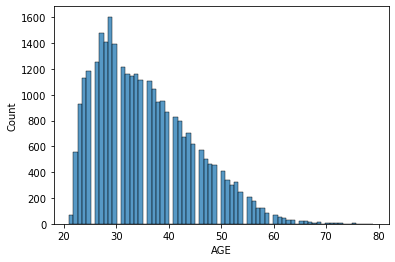

In [24]:
# distribution of AGE
sns.histplot(x="AGE", data=credit)

<AxesSubplot:xlabel='AGE'>

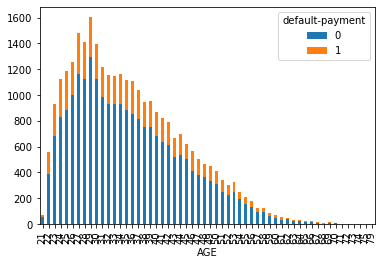

In [25]:
# distribution of AGE by default-payment (1=Yes, 0=No)
pd.crosstab(credit['AGE'], credit['default-payment']).plot(kind='bar', stacked=True)

In [26]:
np.corrcoef(credit['default-payment'], credit['AGE'])

array([[1.        , 0.01388983],
       [0.01388983, 1.        ]])

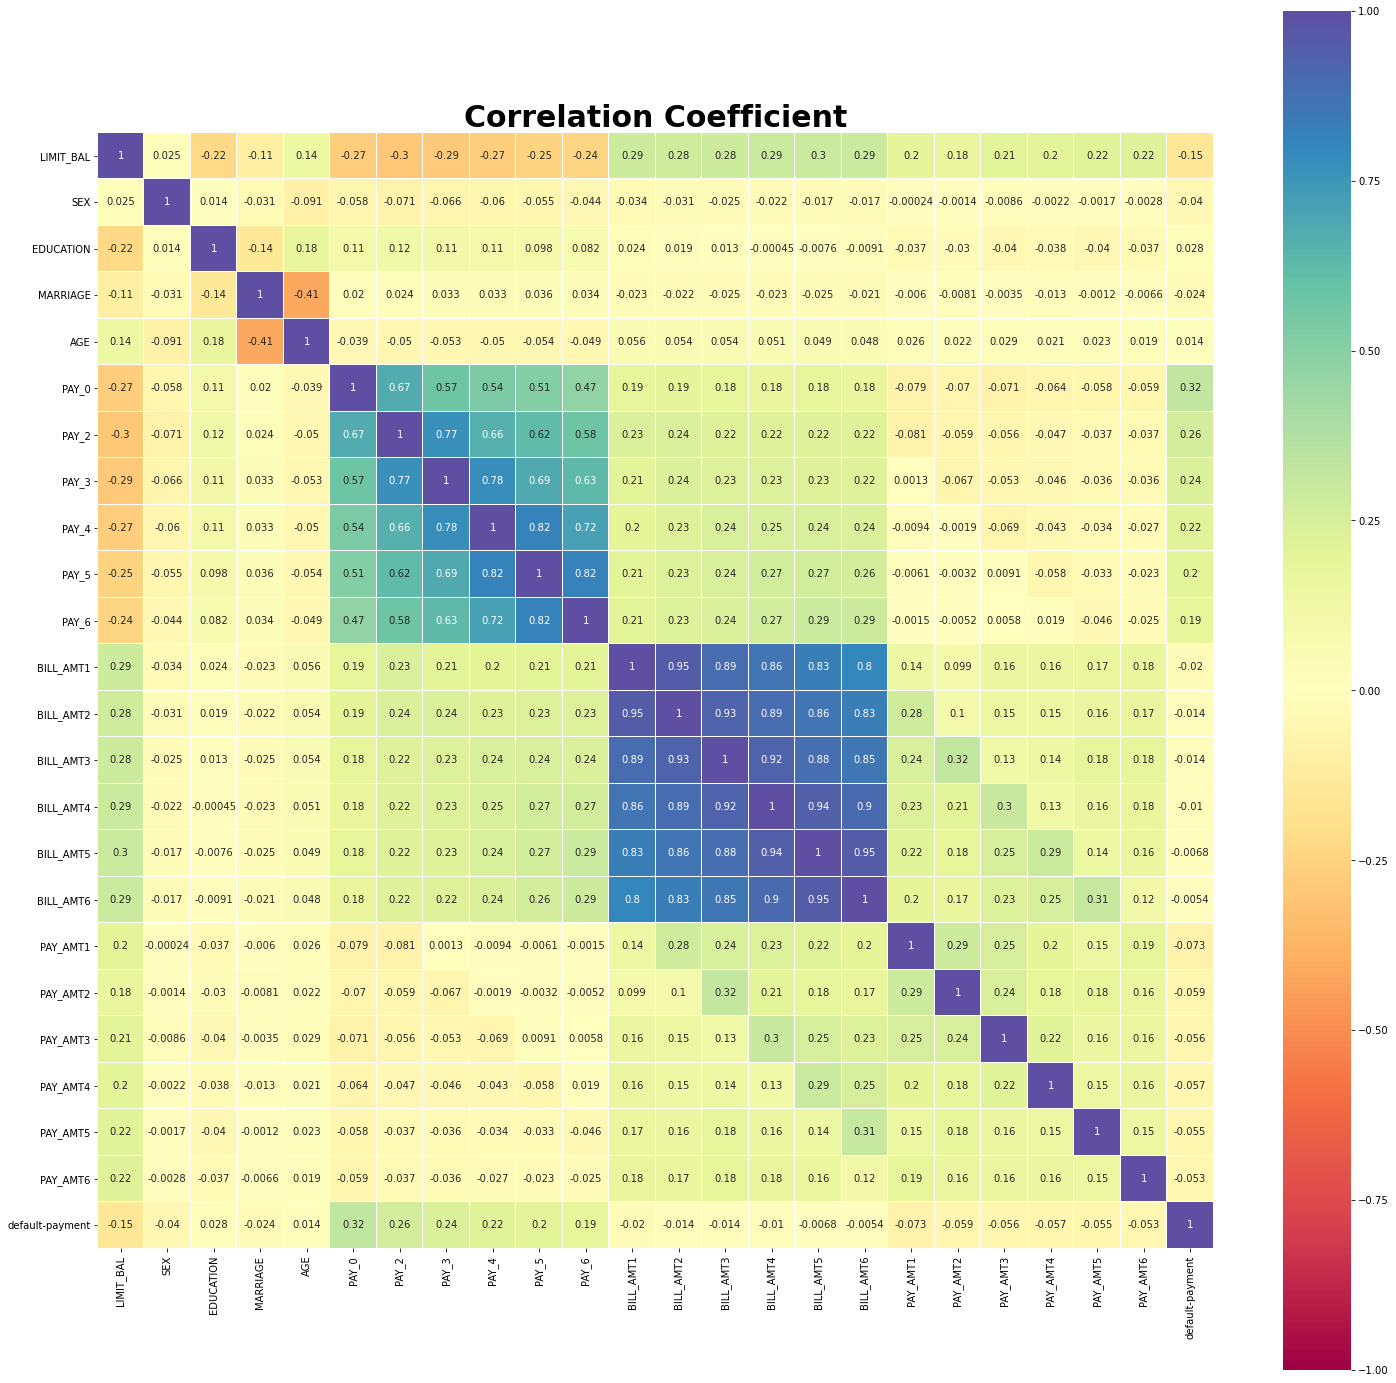

In [27]:
# Correlation Chart
plt.figure(figsize=(25,25))
ax = plt.axes()
corr = credit.corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
ax.set_title('Correlation Coefficient',fontweight="bold", size=30)
plt.show()

# Q3: kNN Model

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
credit.shape

(30000, 24)

In [30]:
# Train Test Split
X = credit.drop('default-payment', axis=1)
y = credit['default-payment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [31]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Q3.1 Build a model of default using kNN. Randomly partition the data into a training set (70%) and a validation set (30%). What value of k did you decide to use and why?

In [33]:
knn = KNeighborsClassifier()
# For sqrt(n) = 4.89 , we can test neighbors arond  
knn_parameters = {'n_neighbors': range(4,10),
                  'leaf_size': [3, 5, 7, 9, 10]
                 }

acc_scorer = make_scorer(accuracy_score)

# Run the 10-fold grid search
grid_obj = GridSearchCV(knn, knn_parameters, cv = 10, scoring = acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the algorithm to the best combination of parameters
knn = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=3, n_neighbors=9)

### Utilizling k-fold method and find that the k = 9 is better.

# Q3.2 Score the validation data (predict) using the model. Produce a confusion table and an ROC for the scored validation data. 

In [34]:
knn.predict(X_test)
round(knn.score(X_train, y_train) * 100, 2)

83.1

In [35]:
y_pred_knn=knn.predict(X_test)
print(y_pred_knn)

[0 0 0 ... 0 0 0]


In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
# produce confusion matrix
cm_knn = confusion_matrix(y_test,y_pred_knn)
print('Confusion matrix\n\n', cm_knn)

Confusion matrix

 [[6526  401]
 [1393  680]]


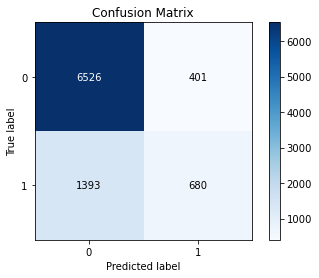

In [38]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn)
plt.show()

In [39]:
#Calculate the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Accuracy: 0.8006666666666666


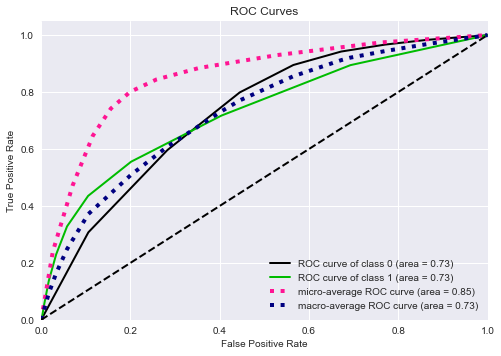

In [40]:
# print an ROC curve
plt.style.use('seaborn')
y_probs_knn = knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probs_knn)
plt.show()

In [41]:
#AUC Score
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_probs_knn[:, 1])
print('AUC Score: {0:0.4f}'.format(auc_score))

AUC Score: 0.7293


#  Q3.3 From the confusion table calculate the following metrics: accuracy, misclassification rate, true positive rate, false positive rate, specificity, precision, and prevalence.

In [42]:
TP = cm_knn[0,0]
TN = cm_knn[1,1]
FN = cm_knn[1,0]
FP = cm_knn[0,1]
population = TP+FN+TN+FP

#Print Classification Accuracy
class_accuracy = (TP + TN) / float(population)
print('Classification accuracy : {0:0.4f}'.format(class_accuracy))

#Print Mis-Classification Rate
class_error = (FP + FN) / float(population)
print('Classification error : {0:0.4f}'.format(class_error))

#Precision Rate
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#True Positive Rate
true_pos_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_pos_rate))

#False Positive Rate
false_pos_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_pos_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

#Prevalence
prevalence = (TP+FP)/population
print('Prevalence : {0:0.4f}'.format(prevalence))

#Tpye 2 error (False negative)
false_neg_rate = FN / (TP+FN)
print('False Negative : {0:0.4f}'.format(false_neg_rate))

Classification accuracy : 0.8007
Classification error : 0.1993
Precision : 0.9421
True Positive Rate : 0.8241
False Positive Rate : 0.3710
Specificity : 0.6290
Prevalence : 0.7697
False Negative : 0.1759


# Q3.4 Use k-means clustering to segment the customers on AGE. What value of k did you decide to use and why?

In [43]:
#! pip install opencv-python
import cv2

In [44]:
from mpl_toolkits.mplot3d import Axes3D # 3d plot
#! pip install termcolor
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

In [45]:
#credit.head()
#credit.info()
print(min(credit.AGE),max(credit.AGE))

21 79


In [46]:
age_21_25 = credit.AGE[(credit.AGE >=21) & (credit.AGE <= 25)]
age_26_35 = credit.AGE[(credit.AGE >=26) & (credit.AGE <= 35)]
age_36_45 = credit.AGE[(credit.AGE >=36) & (credit.AGE <= 45)]
age_46_55 = credit.AGE[(credit.AGE >=46) & (credit.AGE <= 55)]
age_56_65 = credit.AGE[(credit.AGE >=56) & (credit.AGE <= 65)]
age_66_75 = credit.AGE[(credit.AGE >=66) & (credit.AGE <= 75)]
age_76_above = credit.AGE[credit.AGE >=76]

In [47]:
agex = ["21-25","26-35","36-45","46-55","56-65","66-75","76+"]
agey = [len(age_21_25.values),
        len(age_26_35.values),
        len(age_36_45.values),
        len(age_46_55.values),
        len(age_56_65.values),
        len(age_66_75.values),
        len(age_76_above.values)]

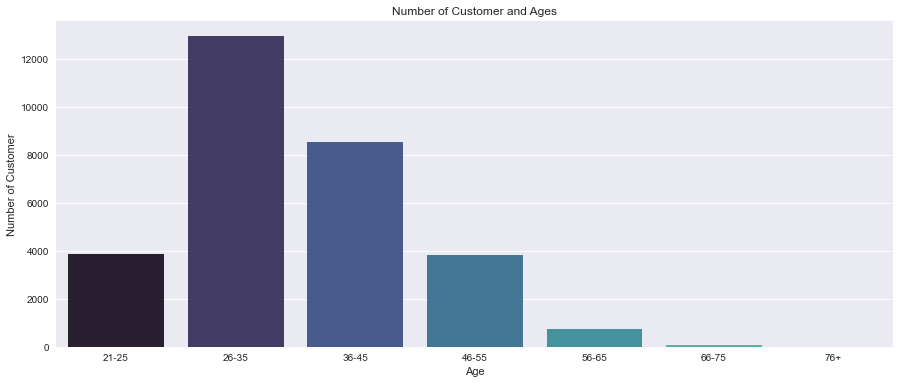

In [48]:
plt.figure(1, figsize=(15,6))                        # Plotting the Graph

sns.barplot(x=agex, y=agey, palette = 'mako')

plt.title('Number of Customer and Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

In [49]:
X1 = credit.loc[:,['AGE','default-payment']].values

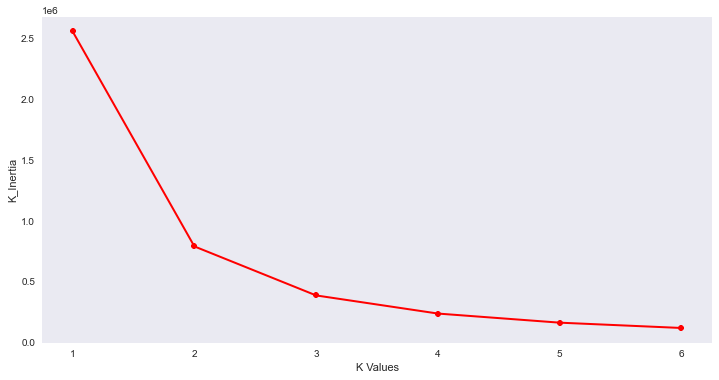

In [50]:
from sklearn.cluster import KMeans

age_ss = []

for k in range(1,7):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    age_ss.append(kmeans.inertia_)

#Visualizing from the Graph to find the K Value where the change in the K-Means Inertia is negligible and that is the point where the curve shoots up.

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,7),age_ss,linewidth = 2, color = "red", marker = "8")
plt.xlabel('K Values')
plt.ylabel("K_Inertia")
plt.show()

### Assigning the value of clusters as 3 that is k = 3
### Because the slope after 3 suddenly become relatively flat

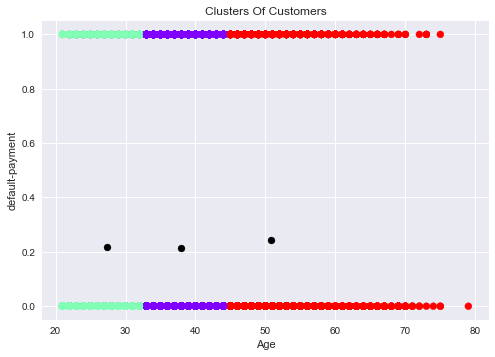

In [51]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X1)

#Cluster based on Age(Scatter Plot)

plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Clusters Of Customers')
plt.xlabel('Age')
plt.ylabel('default-payment')

plt.show()

#  Q3.5 Build a model of default using kNN for each segment. Randomly partition the data into a training set (70%) and a validation set (30%) for each segment. What value of k did you decide to use and why?

In [52]:
AgeSegment = []
for value in credit["AGE"]:
    if value <= 32:
        AgeSegment.append("age_32_below")
    elif value <= 44 and value > 32:
        AgeSegment.append("age_33_44")
    else:
        AgeSegment.append("age_44_above")
       
credit["age_segment"] = AgeSegment   
credit.head

<bound method NDFrame.head of        LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
1          20000    2          2         1   24      2      2     -1     -1   
2         120000    2          2         2   26     -1      2      0      0   
3          90000    2          2         2   34      0      0      0      0   
4          50000    2          2         1   37      0      0      0      0   
5          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29996     220000    1          3         1   39      0      0      0      0   
29997     150000    1          3         2   43     -1     -1     -1     -1   
29998      30000    1          2         2   37      4      3      2     -1   
29999      80000    1          3         1   41      1     -1      0      0   
30000      50000    1 

<AxesSubplot:xlabel='age_segment', ylabel='count'>

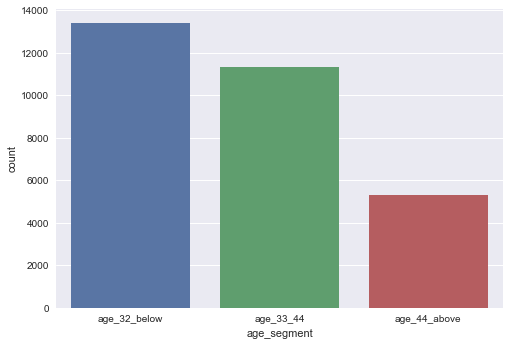

In [53]:
#If default rates differ by age segment # Plotting the Graph
sns.countplot(x="age_segment", data=credit)

<AxesSubplot:xlabel='age_segment'>

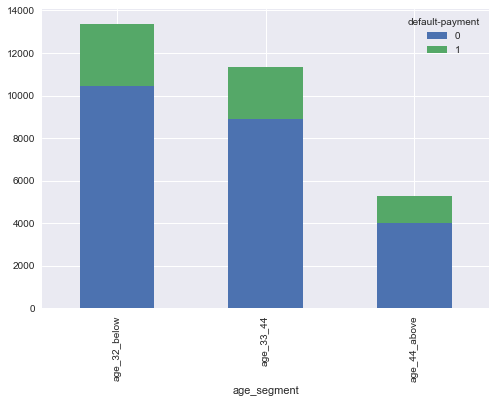

In [54]:
pd.crosstab(credit['age_segment'], credit['default-payment']).plot(kind='bar', stacked=True)

# Q3.6 Score the validation data (predict) using the models. Produce a confusion table for the scored validation data for each segment. How do they compare?

# Q3.6.1 

## age_32_below segment

0    0.781521
1    0.218479
Name: default-payment, dtype: float64


<AxesSubplot:title={'center':'defalut rate in age below 32'}, ylabel='default-payment'>

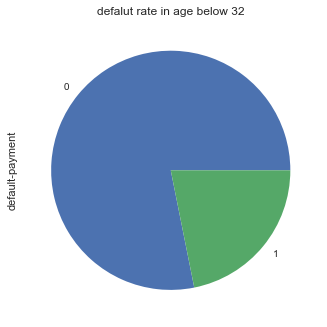

In [55]:
fliter = (credit["age_segment"] == "age_32_below")
filter32below = credit[fliter]
filter32below.head

#defalut rate by age segment
filter32below["default-payment"].value_counts()
graph32 = 1 * filter32below["default-payment"].value_counts() / len(filter32below["default-payment"])
print(graph32)
graph32.plot(kind='pie',title='defalut rate in age below 32')

In [56]:
# Train Test Split
X = filter32below.drop(['default-payment','AGE','age_segment'], axis=1)
y = filter32below['default-payment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [57]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
knn = KNeighborsClassifier()
  
knn_parameters = {'n_neighbors': range(4,10),
                  'leaf_size': range(3,10)
                 }

acc_scorer = make_scorer(accuracy_score)

# Run the 10-fold grid search
grid_obj = GridSearchCV(knn, knn_parameters, cv = 10, scoring = acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the algorithm to the best combination of parameters
knn = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=3, n_neighbors=9)

In [59]:
knn.predict(X_test)
round(knn.score(X_train, y_train) * 100, 2)

83.01

In [60]:
y_pred_knn=knn.predict(X_test)
print(y_pred_knn)

[1 0 0 ... 0 1 0]


In [61]:
# produce confusion matrix for age below 32
cm_knn_32below = confusion_matrix(y_test,y_pred_knn)
print('Confusion matrix\n\n', cm_knn_32below)

Confusion matrix

 [[2897  213]
 [ 586  321]]


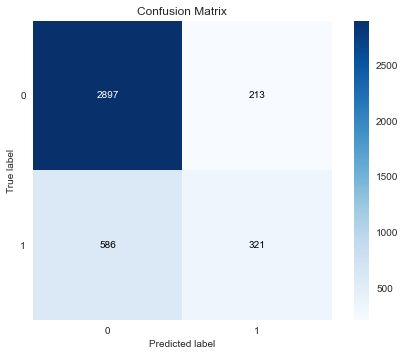

In [62]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn)
plt.show()

In [63]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Accuracy: 0.8010953447846652


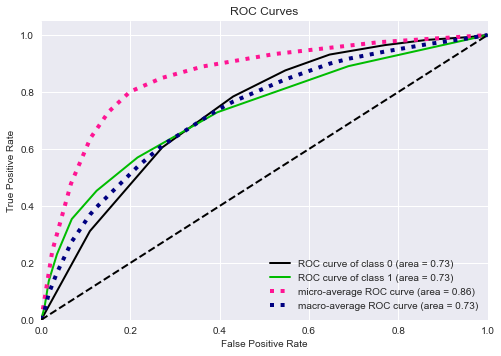

In [64]:
plt.style.use('seaborn')
y_probs_knn = knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probs_knn)
plt.show()

In [65]:
#AUC Score
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_probs_knn[:, 1])
print('AUC Score: {0:0.4f}'.format(auc_score))

AUC Score: 0.7321


# 3.6.2

## age_33_44

0    0.786597
1    0.213403
Name: default-payment, dtype: float64


<AxesSubplot:title={'center':'defalut rate in age between 33 and 44'}, ylabel='default-payment'>

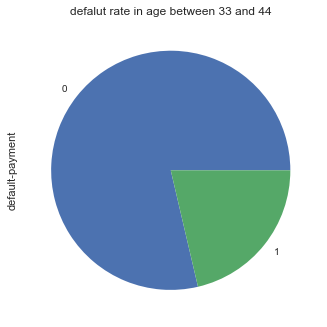

In [66]:
fliter2 = (credit["age_segment"] == "age_33_44")
filter33to44 = credit[fliter2]
filter33to44.head

#defalut rate by age segment
filter33to44["default-payment"].value_counts()
graph3344 = 1 * filter33to44["default-payment"].value_counts() / len(filter33to44["default-payment"])
print(graph3344)
graph3344.plot(kind='pie',title='defalut rate in age between 33 and 44')

In [67]:
X = filter33to44.drop(['default-payment','AGE','age_segment'], axis=1)
y = filter33to44['default-payment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [68]:
# Scale the data
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
knn = KNeighborsClassifier()

knn_parameters = {'n_neighbors': range(4,10),
                  'leaf_size': range(3,10)
                 }

acc_scorer = make_scorer(accuracy_score)

# Run the 10-fold grid search
grid_obj = GridSearchCV(knn, knn_parameters, cv = 10, scoring = acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the algorithm to the best combination of parameters
knn = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=3, n_neighbors=9)

In [70]:
knn.predict(X_test)
round(knn.score(X_train, y_train) * 100, 2)

82.98

In [71]:
y_pred_knn=knn.predict(X_test)
print(y_pred_knn)

[0 0 0 ... 1 0 1]


In [72]:
# produce confusion matrix
cm_knn_33to44 = confusion_matrix(y_test,y_pred_knn)
print('Confusion matrix\n\n', cm_knn_33to44)

Confusion matrix

 [[2552  160]
 [ 449  237]]


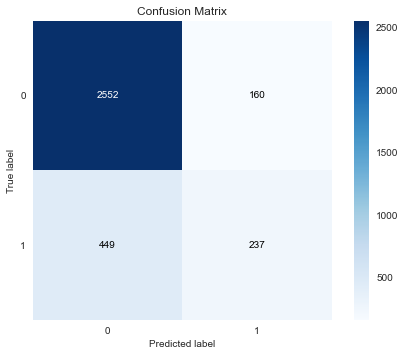

In [73]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn)
plt.show()

In [74]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Accuracy: 0.8207769276044732


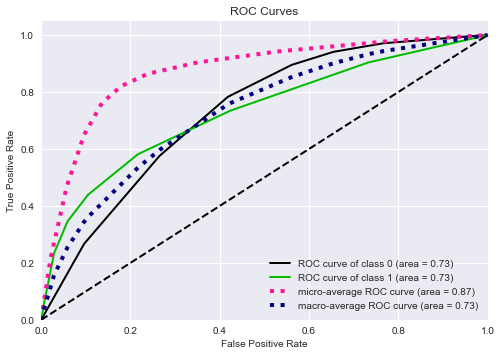

In [75]:
plt.style.use('seaborn')
y_probs_knn = knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probs_knn)
plt.show()

In [76]:
#AUC Score
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_probs_knn[:, 1])
print('AUC Score: {0:0.4f}'.format(auc_score))

AUC Score: 0.7310


# 3.6.3 
## age above 44

0    0.755202
1    0.244798
Name: default-payment, dtype: float64


<AxesSubplot:title={'center':'defalut rate in age above'}, ylabel='default-payment'>

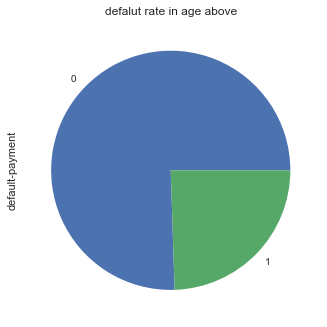

In [77]:
fliter = (credit["age_segment"] == "age_44_above")
filter44above = credit[fliter]
filter44above.head

#defalut rate by age segment
filter44above["default-payment"].value_counts()
graph44 = 1 * filter44above["default-payment"].value_counts() / len(filter44above["default-payment"])
print(graph44)
graph44.plot(kind='pie',title='defalut rate in age above')

In [78]:
# Train Test Split
X = filter44above.drop(['default-payment','AGE','age_segment'], axis=1)
y = filter44above['default-payment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [79]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
knn = KNeighborsClassifier()
  
knn_parameters = {'n_neighbors': range(4,10),
                  'leaf_size': range(3,10)
                 }

acc_scorer = make_scorer(accuracy_score)

# Run the 10-fold grid search
grid_obj = GridSearchCV(knn, knn_parameters, cv = 10, scoring = acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the algorithm to the best combination of parameters
knn = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=3, n_neighbors=8)

In [81]:
knn.predict(X_test)
round(knn.score(X_train, y_train) * 100, 2)

81.49

In [82]:
y_pred_knn=knn.predict(X_test)
print(y_pred_knn)

[0 1 0 ... 0 0 0]


In [83]:
# produce confusion matrix for age above 44
cm_knn_44above = confusion_matrix(y_test,y_pred_knn)
print('Confusion matrix\n\n', cm_knn_44above)

Confusion matrix

 [[1115   69]
 [ 292  110]]


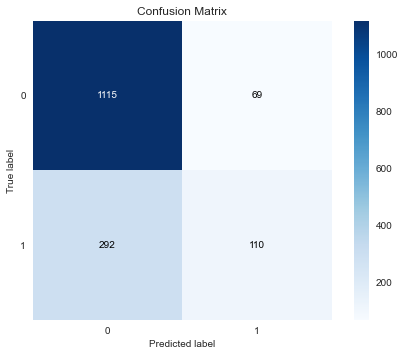

In [84]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn)
plt.show()

In [85]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Accuracy: 0.7723833543505675


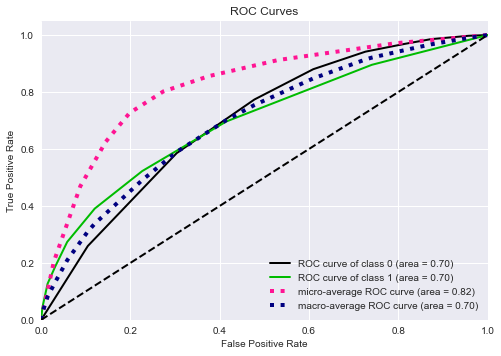

In [86]:
plt.style.use('seaborn')
y_probs_knn = knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probs_knn)
plt.show()

In [87]:
#AUC Score
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_probs_knn[:, 1])
print('AUC Score: {0:0.4f}'.format(auc_score))

AUC Score: 0.6990


# Q3.7 From the confusion tables for each segment calculate the following metrics: accuracy, misclassification rate, true positive rate, false positive rate, specificity, precision, and prevalence. How do they compare?

In [88]:
# age below 32
TP = cm_knn_32below[0,0]
TN = cm_knn_32below[1,1]
FN = cm_knn_32below[1,0]
FP = cm_knn_32below[0,1]
population = TP+FN+TN+FP

#Print Classification Accuracy
class_accuracy = (TP + TN) / float(population)
print('Classification accuracy : {0:0.4f}'.format(class_accuracy))

#Print Mis-Classification Rate
class_error = (FP + FN) / float(population)
print('Classification error : {0:0.4f}'.format(class_error))

#Precision Rate
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#True Positive Rate
true_pos_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_pos_rate))

#False Positive Rate
false_pos_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_pos_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

#Prevalence
prevalence = (TP+FP)/population
print('Prevalence : {0:0.4f}'.format(prevalence))

#Tpye 2 error (False negative)
false_neg_rate = FN / (TP+FN)
print('False Negative : {0:0.4f}'.format(false_neg_rate))

Classification accuracy : 0.8011
Classification error : 0.1989
Precision : 0.9315
True Positive Rate : 0.8318
False Positive Rate : 0.3989
Specificity : 0.6011
Prevalence : 0.7742
False Negative : 0.1682


In [89]:
# age between 33 to 44
TP = cm_knn_33to44[0,0]
TN = cm_knn_33to44[1,1]
FN = cm_knn_33to44[1,0]
FP = cm_knn_33to44[0,1]
population = TP+FN+TN+FP

#Print Classification Accuracy
class_accuracy = (TP + TN) / float(population)
print('Classification accuracy : {0:0.4f}'.format(class_accuracy))

#Print Mis-Classification Rate
class_error = (FP + FN) / float(population)
print('Classification error : {0:0.4f}'.format(class_error))

#Precision Rate
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#True Positive Rate
true_pos_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_pos_rate))

#False Positive Rate
false_pos_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_pos_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

#Prevalence
prevalence = (TP+FP)/population
print('Prevalence : {0:0.4f}'.format(prevalence))

#Tpye 2 error (False negative)
false_neg_rate = FN / (TP+FN)
print('False Negative : {0:0.4f}'.format(false_neg_rate))

Classification accuracy : 0.8208
Classification error : 0.1792
Precision : 0.9410
True Positive Rate : 0.8504
False Positive Rate : 0.4030
Specificity : 0.5970
Prevalence : 0.7981
False Negative : 0.1496


In [90]:
# age 44 above
TP = cm_knn_44above[0,0]
TN = cm_knn_44above[1,1]
FN = cm_knn_44above[1,0]
FP = cm_knn_44above[0,1]
population = TP+FN+TN+FP

#Print Classification Accuracy
class_accuracy = (TP + TN) / float(population)
print('Classification accuracy : {0:0.4f}'.format(class_accuracy))

#Print Mis-Classification Rate
class_error = (FP + FN) / float(population)
print('Classification error : {0:0.4f}'.format(class_error))

#Precision Rate
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#True Positive Rate
true_pos_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_pos_rate))

#False Positive Rate
false_pos_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_pos_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

#Prevalence
prevalence = (TP+FP)/population
print('Prevalence : {0:0.4f}'.format(prevalence))

#Tpye 2 error (False negative)
false_neg_rate = FN / (TP+FN)
print('False Negative : {0:0.4f}'.format(false_neg_rate))

Classification accuracy : 0.7724
Classification error : 0.2276
Precision : 0.9417
True Positive Rate : 0.7925
False Positive Rate : 0.3855
Specificity : 0.6145
Prevalence : 0.7465
False Negative : 0.2075


# Q3.8 Produce an ROC curve for each AGE segment and report the AUCs. 

### See ROC curves and AUC scores above in each age segment sections 3.6.1 - 3.6.3

# Q3.9 Do any of the models built on the AGE segments have a better classification performance than the non-segmented population model? How much better or worse?

### The 2nd age segment (Age 33-44) has a slightly higher accuracy score (82%) and lower false negative rate (15%) than the non-segmented model (accuracy = 80%, fnr = 17.6%), but the other two segments (Age below 32 and Age above 44) have similar or lower accuracy score and higher false negative rate. The results are summarized in the presentation slides.

# <font color="blue"> Q4: Neural Network Model</font>

# Q4.1 Build a model of default using ANN. Randomly partition the data into a training set (70%) and a validation set (30%).

In [91]:
# Do we use the same training set and test set from above models?
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, roc_curve

In [92]:
# Use Multi-layer Perceptron Classifier Model
mlp = MLPClassifier(verbose = True, max_iter= 300, tol = 0.000010, random_state=100)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.56620247
Iteration 2, loss = 0.52445368
Iteration 3, loss = 0.50579062
Iteration 4, loss = 0.49405129
Iteration 5, loss = 0.48673306
Iteration 6, loss = 0.48043110
Iteration 7, loss = 0.47557398
Iteration 8, loss = 0.47246040
Iteration 9, loss = 0.46887719
Iteration 10, loss = 0.46566235
Iteration 11, loss = 0.46324287
Iteration 12, loss = 0.46100873
Iteration 13, loss = 0.45938003
Iteration 14, loss = 0.45796273
Iteration 15, loss = 0.45556541
Iteration 16, loss = 0.45395392
Iteration 17, loss = 0.45241487
Iteration 18, loss = 0.45203655
Iteration 19, loss = 0.45017650
Iteration 20, loss = 0.44856792
Iteration 21, loss = 0.44811929
Iteration 22, loss = 0.44616157
Iteration 23, loss = 0.44547879
Iteration 24, loss = 0.44446938
Iteration 25, loss = 0.44424319
Iteration 26, loss = 0.44350159
Iteration 27, loss = 0.44159737
Iteration 28, loss = 0.44128052
Iteration 29, loss = 0.44081641
Iteration 30, loss = 0.43867593
Iteration 31, loss = 0.43846617
Iteration 32, los

Iteration 253, loss = 0.36205075
Iteration 254, loss = 0.36135345
Iteration 255, loss = 0.36211852
Iteration 256, loss = 0.36180889
Iteration 257, loss = 0.36234210
Iteration 258, loss = 0.36237198
Iteration 259, loss = 0.36053564
Iteration 260, loss = 0.36151674
Iteration 261, loss = 0.36161836
Iteration 262, loss = 0.36035693
Iteration 263, loss = 0.36064592
Iteration 264, loss = 0.35986023
Iteration 265, loss = 0.36005459
Iteration 266, loss = 0.35986462
Iteration 267, loss = 0.35891241
Iteration 268, loss = 0.35875246
Iteration 269, loss = 0.35972588
Iteration 270, loss = 0.36011445
Iteration 271, loss = 0.36060713
Iteration 272, loss = 0.35960358
Iteration 273, loss = 0.35826260
Iteration 274, loss = 0.35824645
Iteration 275, loss = 0.35803922
Iteration 276, loss = 0.35819790
Iteration 277, loss = 0.35698578
Iteration 278, loss = 0.35642961
Iteration 279, loss = 0.35758737
Iteration 280, loss = 0.35601395
Iteration 281, loss = 0.35636850
Iteration 282, loss = 0.35551169
Iteration 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=100, tol=1e-05, verbose=True)

# Q4.2 Score the validation data (predict) using the model. Produce a confusion table and an ROC for the scored validation data. 

In [93]:
# predict using the testing set
y_pred_mlp = mlp.predict(X_test)

In [94]:
# classification report for NN model
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1184
           1       0.56      0.38      0.45       402

    accuracy                           0.77      1586
   macro avg       0.68      0.64      0.65      1586
weighted avg       0.75      0.77      0.75      1586



In [95]:
# produce confusion matrix for NN model
cm_mlp = confusion_matrix(y_test,y_pred_mlp)
print('Confusion matrix\n\n', cm_mlp)

Confusion matrix

 [[1063  121]
 [ 249  153]]


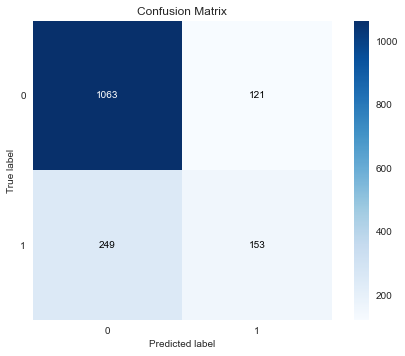

In [96]:
# show confusion matrix as a plot for NN model
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred_mlp)
plt.show()

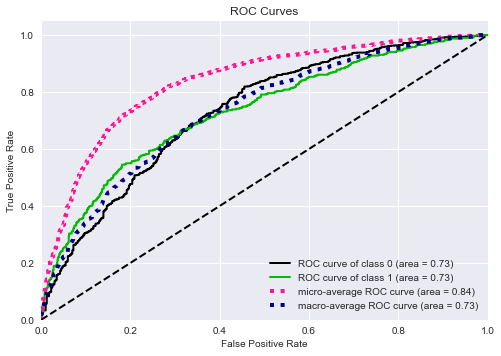

In [97]:
# print an ROC curve for NN model
plt.style.use('seaborn')
y_probs_mlp = mlp.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probs_mlp)
plt.show()

In [98]:
#AUC Score
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_probs_mlp[:, 1])
print('AUC Score: {0:0.4f}'.format(auc_score))

AUC Score: 0.7318


# Q4.3 From the confusion table calculate the following metrics: accuracy, misclassification rate, true positive rate, false positive rate, specificity, precision, and prevalence.

In [99]:
TP = cm_mlp[0,0]
TN = cm_mlp[1,1]
FN = cm_mlp[1,0]
FP = cm_mlp[0,1]
population = TP+FN+TN+FP

#Print Classification Accuracy
class_accuracy = (TP + TN) / float(population)
print('Classification accuracy : {0:0.4f}'.format(class_accuracy))

#Print Mis-Classification Rate
class_error = (FP + FN) / float(population)
print('Classification error : {0:0.4f}'.format(class_error))

#Precision Rate
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#True Positive Rate
true_pos_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_pos_rate))

#False Positive Rate
false_pos_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_pos_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

#Prevalence
prevalence = (TP+FP)/population
print('Prevalence : {0:0.4f}'.format(prevalence))

#Tpye 2 error (False negative)
false_neg_rate = FN / (TP+FN)
print('False Negative : {0:0.4f}'.format(false_neg_rate))

Classification accuracy : 0.7667
Classification error : 0.2333
Precision : 0.8978
True Positive Rate : 0.8102
False Positive Rate : 0.4416
Specificity : 0.5584
Prevalence : 0.7465
False Negative : 0.1898
